# StudentsPerformance Exploration


## Preliminary Wrangling

This document explores a dataset containing grades,informations and multi attributes  about 1000 students 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
%matplotlib inline

In [2]:
#load data
df= pd.read_csv("StudentsPerformance.csv")

In [3]:
# high-level overview of data shape and composition
print(df.shape)
print(df.head(10))
print(df.info())

(1000, 8)
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   
5  female        group B          associate's degree      standard   
6  female        group B                some college      standard   
7    male        group B                some college  free/reduced   
8    male        group D                 high school  free/reduced   
9  female        group B                 high school  free/reduced   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2        

In [4]:
#copy from orginal df
df2=df.copy() 
df2.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
#renaming the columns
df2.rename(columns = {"race/ethnicity": "race", 
                           "parental level of education":"parent_education", 
                           "test preparation course": "test_preparation_course",
                            "math score":"maths_score",
                            "reading score":"reading_score",
                            "writing score":"writing_score"},inplace=True)
df2.head()

,gender,race,parent_education,lunch,test_preparation_course,maths_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
# creating a new columns pass_math,reading_math,writing_math this columns will tell us whether the students are pass or fail
passmarks = 40  #assume passmark=40
df2['pass_math'] = np.where(df2['maths_score']< passmarks, 'Fail', 'Pass')
df2['pass_reading'] = np.where(df2['reading_score']< passmarks, 'Fail', 'Pass')
df2['pass_writing'] = np.where(df2['writing_score']< passmarks, 'Fail', 'Pass')

In [7]:
#creating a new columns of total score of each student
df2['Total_score']= df2['maths_score']+df2['writing_score']+df2['reading_score']

In [8]:
#creating a new column of percentage of each student
df2['percentage_score']=df2['Total_score']/300

In [9]:
#creating a new columns pass/fail result of each student
def result(percentage_score):
    if percentage_score >=0.33:
        return "Pass"
    else:
        return "Fail"
    
df2['result_score']=df2['percentage_score'].apply(result)

In [10]:
#the new data
df2.head()

,gender,race,parent_education,lunch,test_preparation_course,maths_score,reading_score,writing_score,pass_math,pass_reading,pass_writing,Total_score,percentage_score,result_score
0,female,group B,bachelor's degree,standard,none,72,72,74,Pass,Pass,Pass,218,0.726667,Pass
1,female,group C,some college,standard,completed,69,90,88,Pass,Pass,Pass,247,0.823333,Pass
2,female,group B,master's degree,standard,none,90,95,93,Pass,Pass,Pass,278,0.926667,Pass
3,male,group A,associate's degree,free/reduced,none,47,57,44,Pass,Pass,Pass,148,0.493333,Pass
4,male,group C,some college,standard,none,76,78,75,Pass,Pass,Pass,229,0.763333,Pass


In [11]:
# descriptive statistics for numeric variables
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
maths_score,1000.0,66.089000,15.163080,0.00,57.000000,66.000000,77.000000,100.0
reading_score,1000.0,69.169000,14.600192,17.00,59.000000,70.000000,79.000000,100.0
writing_score,1000.0,68.054000,15.195657,10.00,57.750000,69.000000,79.000000,100.0
Total_score,1000.0,203.312000,42.771978,27.00,175.000000,205.000000,233.000000,300.0
percentage_score,1000.0,0.677707,0.142573,0.09,0.583333,0.683333,0.776667,1.0


In [12]:
df2["parent_education"].value_counts().index,df2["race"].value_counts().index


(Index(['some college', 'associate's degree', 'high school', 'some high school',
        'bachelor's degree', 'master's degree'],
       dtype='object'),
 Index(['group C', 'group D', 'group B', 'group E', 'group A'], dtype='object'))

In [13]:
# convert parental level of education and race/ethnicity into ordered categorical types
ordinal_var_dict = {'parent_education': ["some high school","high school","some college","associate's degree"
                                                    ,"bachelor's degree","master's degree"],
                    'race': ['group E', 'group D', 'group C', 'group B', 'group A']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df2[var] = df2[var].astype(ordered_var)

### What is the structure of your dataset?

There are 1000 students in the dataset with 14 features (gender, race,parent_education, launch, test_preparation_course, math_ score, reading_score, writing_score,pass_math,pass_reading,pass_writing,Total_score,percentage_score,result_score). 5 of the variables are numeric(math_score, reading_score, writing_score,Total_score,percentage_score) and 9 of  the variables are categorical (gender, race, parent_education, launch, test_preparation_course,pass_math,pass_reading,pass_writing,result_score), parent_education and  lunch are ordered factor variables with the following levels.

(lowest) ——> (highst) <br>
parent_education: some high school, high school,some college, associate's degree, bachelor's degree ,master's degree <br>
race: group E, group D, group C, group B, group A <br>

### What is/are the main feature(s) of interest in your dataset?

I'm  interested in all data particulary feature like (parent_education) and if it influence in the students features and score of the students or not 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
I think all the features in this data are Connected but feature like "parent_education" , 'math score',	'reading score' and 'writing score' will be intersting if they are connect or not we will see that later

## Univariate Exploration

I'll start by looking at the comparaison of the main variable of interest: parent_education.

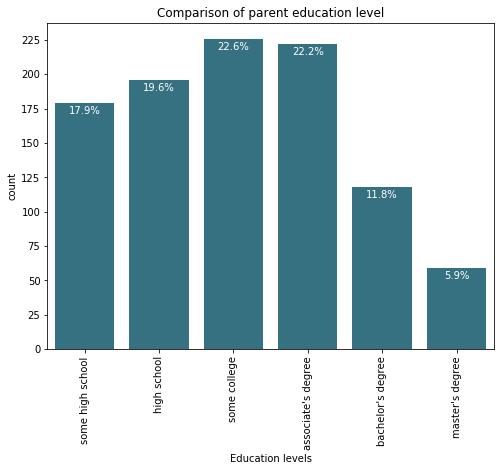

In [14]:
# create the plot
default_color = sb.color_palette('viridis',9)[3]
plt.figure(figsize = [8, 6])
sb.countplot(data = df2, x = 'parent_education', color = default_color);
# add annotations
n_df=df2.shape[0]
parental_counts = df2['parent_education'].value_counts()
locs, labels = plt.xticks() 
# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = parental_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_df)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'w',fontweight = 30)
    
plt.xticks(rotation=90);
plt.title('Comparison of parent education level');
plt.yticks([0,25,50,75,100,125,150,175,200,225]);
plt.xlabel("Education levels");


at the Bar chart above we figure out at (parental level of education) :
the highest category in it is "some collage" with prop = 22.6% , and the next from it is ""associate's degree" with prop =22.2%
and the lowest category is "master's degree" with prop = 5.9% .

now lets know about another feature in the data such as the 'race'


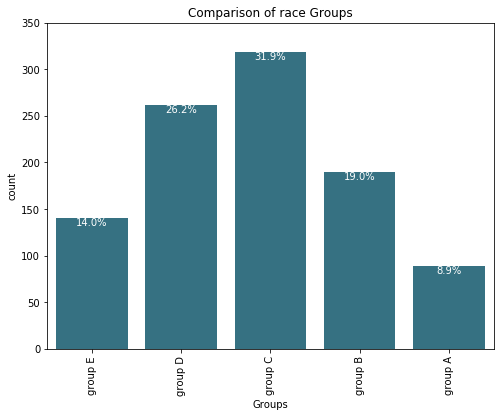

In [15]:
# create the plot
default_color = sb.color_palette('viridis',9)[3]
plt.figure(figsize = [8, 6])
sb.countplot(data = df2, x = 'race', color = default_color);
# add annotations
parental_counts = df2['race'].value_counts()
locs, labels = plt.xticks() 
# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = parental_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_df)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'w')
    
plt.xticks(rotation=90);
plt.title('Comparison of race Groups', fontweight = 30);
plt.yticks([0,50,100,150,200,250,300,350]);
plt.xlabel("Groups");


at this  Bar chart too  we figure out at (race) :
the highest category in it is "group C" with prop = 31.9% , and the next from it is "group D" with prop =26.2%
and the lowest category is group A" with prop = 8.9% .

let's look to the others  categorical features (gender, lunch, test preparation course)


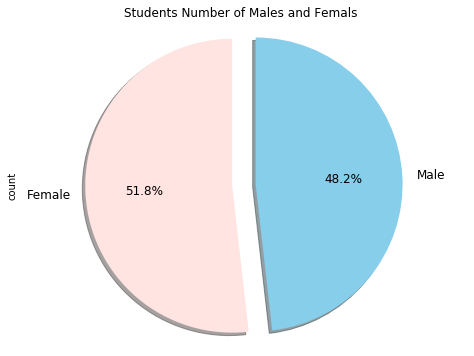

In [16]:
plt.figure(figsize = [8, 6])
colors=( 'mistyrose', 'skyblue')
plt.pie(df2['gender'].value_counts()/n_df,labels=('Female','Male'),
        explode = [0.08,0.08],autopct ='%1.1f%%'
        ,shadow = True,startangle = 90, textprops={'fontsize': 12},colors=colors);
plt.title('Students Number of Males and Femals  ', fontsize=12 );
plt.axis('equal');
plt.ylabel('count')

plt.show()


at the gender there is Female / Male so i used this Pie chart to make it easy to you and in it we discovered that in this data 
the Female students are more than Male students , the Females = 51.8% and Males = 48.2%

lets see another feature (lunch)

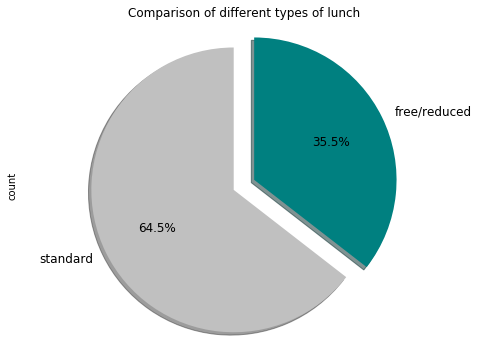

In [17]:
plt.figure(figsize = [8, 6])
colors=( 'silver', 'teal')
plt.pie(df2['lunch'].value_counts()/n_df,labels=('standard','free/reduced'),
        explode = [0.08,0.08],autopct ='%1.1f%%'
        ,shadow = True,startangle = 90, textprops={'fontsize': 12},colors=colors)
plt.title('Comparison of different types of lunch', fontsize=12 );
plt.axis('equal')
plt.ylabel('count')
plt.show()


at this Pie chart we saw that most students have "standard" lunch with prop  =64.5% , 
and the rest of students with "free or reduced" lunch with prop =35.5% .

let's see the categorical feature (test preparation course)

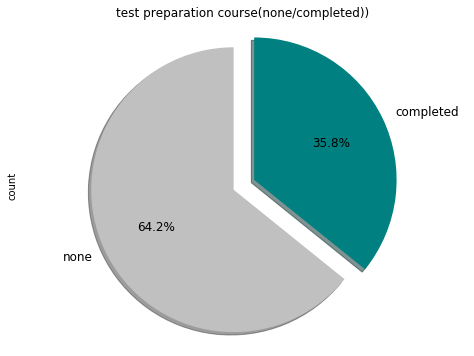

In [18]:
plt.figure(figsize = [8, 6])
colors=( 'silver', 'teal')
plt.pie(df2['test_preparation_course'].value_counts()/n_df,labels=('none','completed'),
        explode = [0.08,0.08],autopct ='%1.1f%%'
        ,shadow = True,startangle = 90, textprops={'fontsize': 12},colors=colors)
plt.title('test preparation course(none/completed)) ', fontsize=12 );
plt.axis('equal')
plt.ylabel('count')
plt.show()


at this Pie chart  we discoverd that most of the students didn't completed the test preparation course . 
64.2% didn't completed the preparation and  35.8% completed the preparation.


let's continue and see another  categorical feature (pass_math)


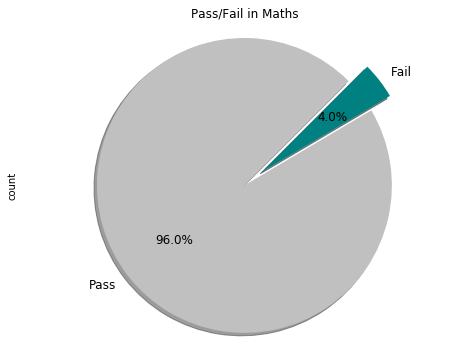

In [19]:
plt.figure(figsize = [8, 6])
plt.pie(df2['pass_math'].value_counts()/n_df,labels=('Pass','Fail'),
        explode = [0.08,0.08],autopct ='%1.1f%%'
        ,shadow = True,startangle = 45, textprops={'fontsize': 12},colors=colors)
plt.title('Pass/Fail in Maths', fontweight = 12, fontsize = 12)
plt.ylabel('count')
plt.axis('equal')
plt.show()

very good it look like the students love math :
 at this Pie chart we saw that most students have "Pass" in (maths) with prop =96% , 
and the rest of students have "Fail" with prop =4% .

what about reading? let's see it 

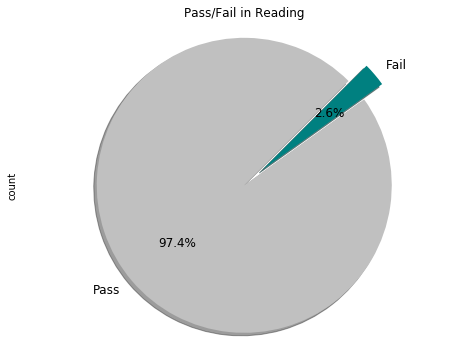

In [20]:
plt.figure(figsize = [8, 6])
plt.pie(df2['pass_reading'].value_counts()/n_df,labels=('Pass','Fail'),
        explode = [0.08,0.08],autopct ='%1.1f%%'
        ,shadow = True,startangle = 45, textprops={'fontsize': 12},colors=colors)
plt.title('Pass/Fail in Reading', fontweight = 12, fontsize = 12)
plt.ylabel('count')
plt.axis('equal')
plt.show()

 look like the students love reading too :
 at this Pie chart we saw that most students have "Pass" in (readind) with prop =97.4% , 
and the rest of students have "Fail" with prop =2.6% .

what about writing? let's see it 

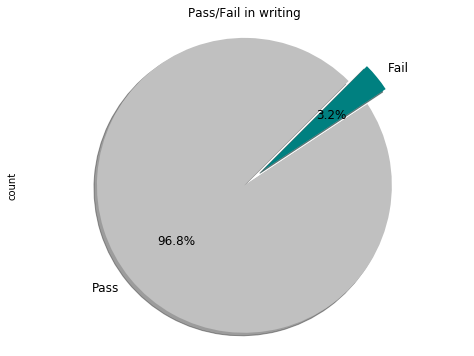

In [21]:
plt.figure(figsize = [8, 6])
plt.pie(df2['pass_writing'].value_counts()/n_df,labels=('Pass','Fail'),
        explode = [0.08,0.08],autopct ='%1.1f%%'
        ,shadow = True,startangle = 45, textprops={'fontsize': 12},colors=colors)
plt.title('Pass/Fail in writing', fontweight = 12, fontsize = 12)
plt.ylabel('count')
plt.axis('equal')
plt.show()

 the students love writing too :
 at this Pie chart we saw that most students have "Pass" in (wriring) with prop =96.8% , 
and the rest of students have "Fail" with prop =3.2% .

what about all the three subjects ? what the prop of Pass and fail in all of it ? let's figur out >>>

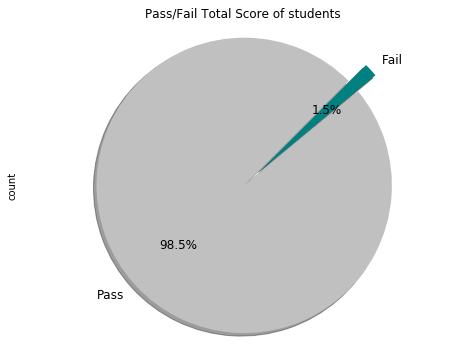

In [22]:
plt.figure(figsize = [8, 6])
plt.pie(df2['result_score'].value_counts()/n_df,labels=('Pass','Fail'),
        explode = [0.08,0.08],autopct ='%1.1f%%'
        ,shadow = True,startangle = 45, textprops={'fontsize': 12},colors=colors)
plt.title('Pass/Fail Total Score of students ', fontweight = 12, fontsize = 12)
plt.ylabel('count')
plt.axis('equal')
plt.show()

it look like most of the students of this data are smart :
most of the students have "Pass" in the three subjects together with( prop = 98.5% )and the rest "fail" with (prop = 1.5%)


now we are done with categorical features now we will move on to the numeric features (math_score, reading_score, writing_score,Total_score,percentage_score)

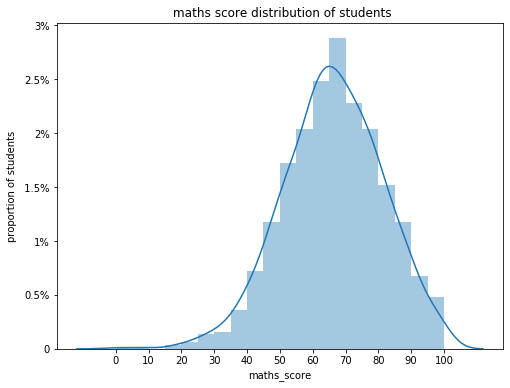

In [23]:
# univariate plot of math score
plt.figure(figsize = [8, 6])
d_bins=np.arange(0, df2['maths_score'].max()+5, 5)
sb.distplot(df2["maths_score"],d_bins);
plt.yticks([0, 0.005,0.010, 0.015, 0.020,0.025,0.030],[0, "0.5%","1%"," 1.5%","2%","2.5%","3%"]);
plt.xticks([0, 10,20,30,40,50,60,70,80,90,100]);
plt.title(" maths score distribution of students");
plt.ylabel("proportion of students");

as we see at this plot it look as a normal distribution we have 1000 student and there grades in math distribution as we see at 
the plot above , at the y axis this is proportion of students and their grades at math and the mean of the students grades are between 65-70 and and the distribution is right skewd .

next to reading score distribution>>

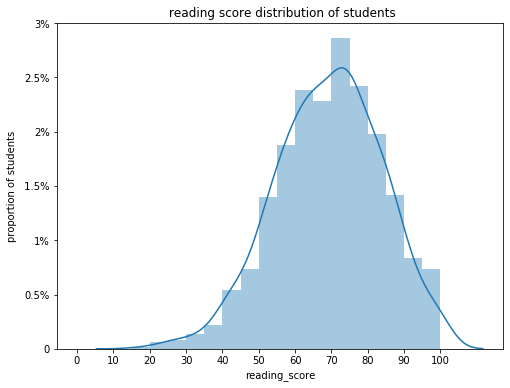

In [24]:
# univariate plot of reading score
plt.figure(figsize = [8, 6])
d_bins=np.arange(0, df2['reading_score'].max()+5, 5)
sb.distplot(df2["reading_score"],d_bins);
plt.yticks([0, 0.005,0.010, 0.015, 0.020,0.025,0.030],[0, "0.5%","1%"," 1.5%","2%","2.5%","3%"]);
plt.xticks([0, 10,20,30,40,50,60,70,80,90,100]);
plt.title(" reading score distribution of students");
plt.ylabel("proportion of students");

it look similar to math score distribution,
as we see at this plot it look as a normal distribution we have 1000 student and there grades in math distribution as we see at 
the plot above ,  the mean of the students grades are between 65-70 and and the distribution is also right skewd .

next to writing score distribution>>

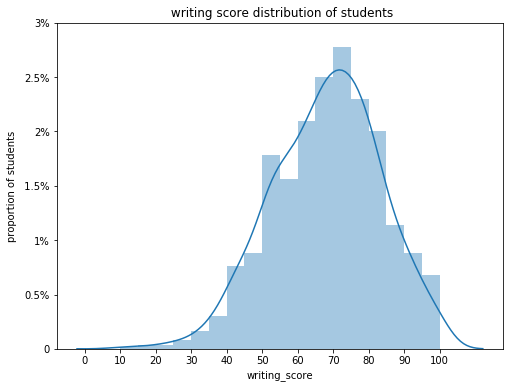

In [25]:
# univariate plot of writing score
plt.figure(figsize = [8, 6])
d_bins=np.arange(0, df2['writing_score'].max()+5, 5)
sb.distplot(df2["writing_score"],d_bins);
plt.yticks([0, 0.005,0.010, 0.015, 0.020,0.025,0.030],[0, "0.5%","1%"," 1.5%","2%","2.5%","3%"]);
plt.xticks([0, 10,20,30,40,50,60,70,80,90,100]);
plt.title(" writing score distribution of students");
plt.ylabel("proportion of students");

it look similar to the above distributions,
as we see at this plot it look as a normal distribution we have 1000 student and there grades in math distribution as we see at 
the plot above ,  the mean of the students grades are between 65-70 and and the distribution is also right skewd .

next to writing score Total score>>

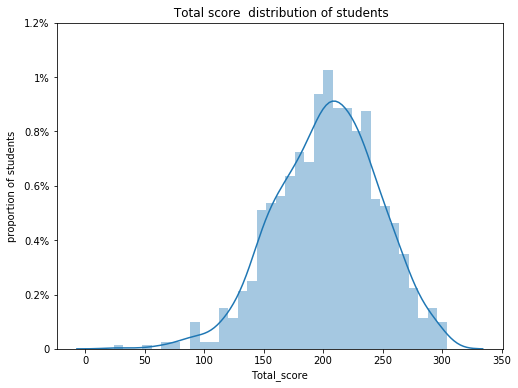

In [26]:
# univariate plot of Total score
plt.figure(figsize = [8, 6])
d_bins=np.arange(0, df2['Total_score'].max()+8, 8)
sb.distplot(df2["Total_score"],d_bins);
plt.yticks([0, 0.002,0.004, 0.006, 0.008,0.010,0.012],[0, "0.2%","0.4%"," 0.6%","0.8%","1%","1.2%"]);
plt.title(" Total score  distribution of students");
plt.ylabel("proportion of students");

here the yaxis changed because we deal the total score which is 300 (sum of 3 subject with total grade of 100) so the y axis changed from  0-1.2% but the distribution is still like the others as normal distribution and skewd to right

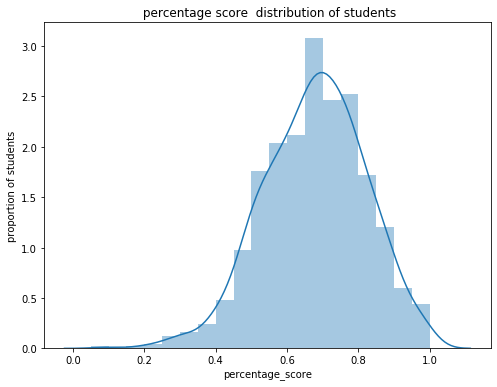

In [27]:
# univariate plot of math score
plt.figure(figsize = [8, 6])
d_bins=np.arange(0, df2['percentage_score'].max()+0.05, 0.05)
sb.distplot(df2["percentage_score"],d_bins);
plt.title(" percentage score  distribution of students");
plt.ylabel("proportion of students");

and this is the last num distribution and is also as normal distribution and skewd to right



# Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

i didn't need to perform any transformations the ranges weren't big and good to use and the distributions of the variables was normal distributions

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
 the distributions was usual , so there is no operations to do

let's dive in the data and know more about it with the  Bivariate Exploration


# Bivariate Exploration

To start off with, I want to look at the pairwise correlations present between features in the data.

In [28]:
#list of categoric features
categoric_vars = ['gender', 'race', 'parent_education', 'lunch', 'test_preparation_course', 'pass_math', 'pass_reading',"pass_writing","result_score"]
#list of numeric features
numeric_vars = ['maths_score', 'reading_score', 'writing_score',"Total_score","percentage_score"]


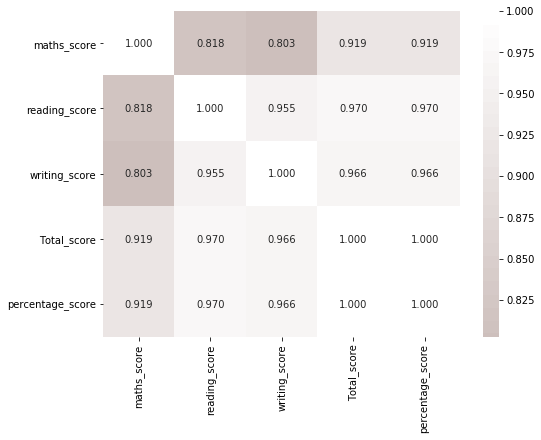

In [29]:
# correlation plot
plt.figure(figsize = [8, 6])
sb.heatmap(df2[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'terrain', center = 0)
plt.show()

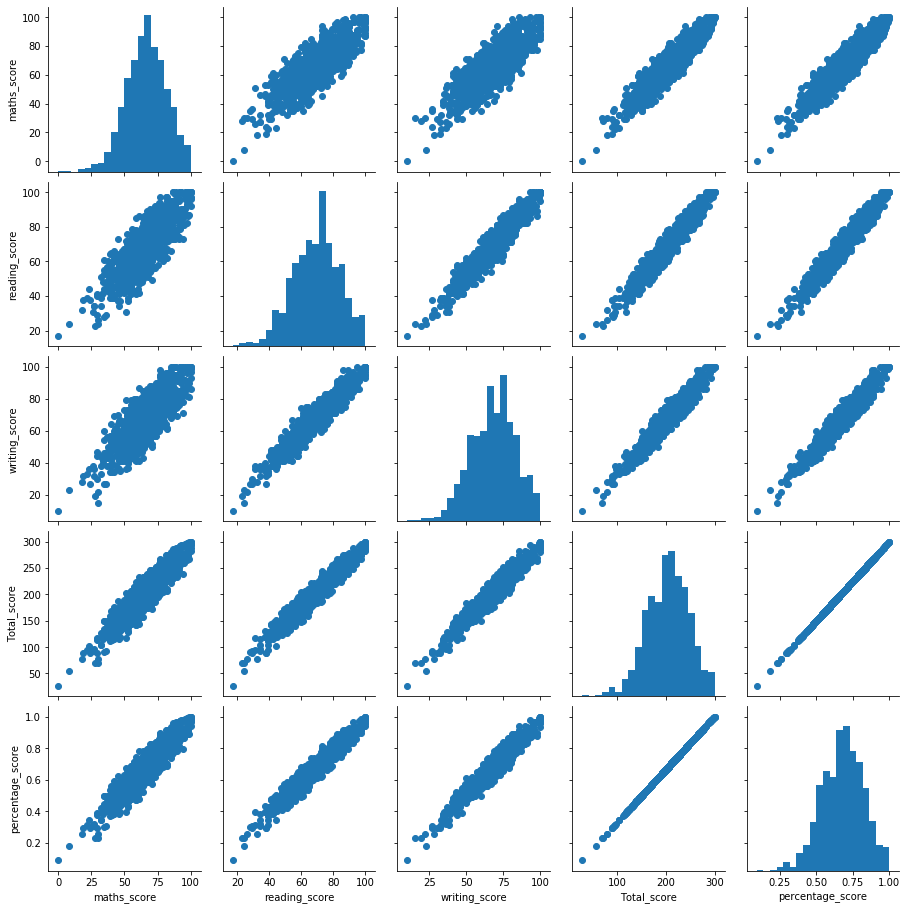

In [30]:
g = sb.PairGrid(data = df2, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

as we see at the heat map and hist plots all the data featuers are highly correlated and  this apear with numbers at the heat map and with the plots at the hist plots

<Figure size 720x720 with 0 Axes>

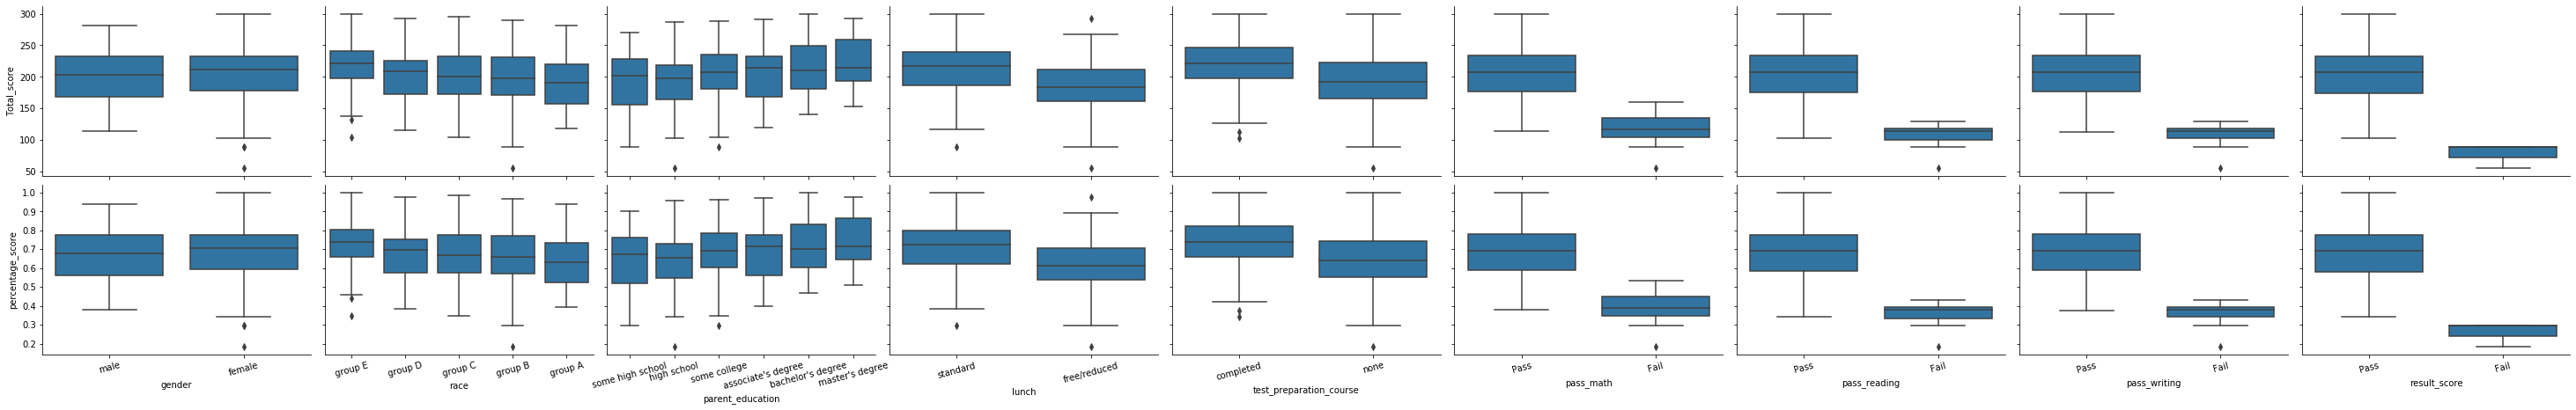

In [55]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.
warnings.filterwarnings("ignore")

samples = np.random.choice(df2.shape[0], 400, replace = False)
students_samp = df2.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0];
    sb.boxplot(x, y, color = default_color);
    plt.xticks(rotation=15);

plt.figure(figsize = [10, 10]);
g = sb.PairGrid(data = students_samp, y_vars = ['Total_score', 'percentage_score'], x_vars = categoric_vars,
               size = 3, aspect = 1.5);
g.map(boxgrid);
plt.show();

the plots above are asummary of the realations between all the categorical features with the total score and percentage score we will discuss 
most of them Separately and dive into deep ralations between featuers below >>>  

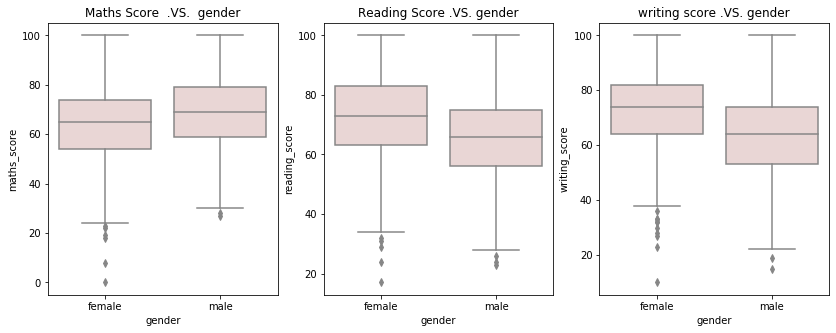

In [32]:
#relation between gender and marks scored in each subject
plt.figure(figsize=(14,5))
plt.subplot(1, 3, 1);
default_color = sb.color_palette('vlag',9)[5]

   #plot for maths score
sb.boxplot(data=df2,x='gender', y='maths_score',color=default_color)
plt.title("Maths Score  .VS.  gender");

    #plot for reading score
plt.subplot(1, 3, 2);
sb.boxplot(data=df2,x='gender', y='reading_score',color=default_color)
plt.title("Reading Score .VS. gender");
    
    #plot for writing score
plt.subplot(1, 3, 3);
sb.boxplot(data=df2,x='gender', y='writing_score',color=default_color)
plt.title("writing score .VS. gender");
    
plt.show();

In [33]:
#relation between gender and marks scored in each subject
warnings.filterwarnings("ignore")
df2.groupby('gender')['maths_score',"reading_score","writing_score"].mean().T


gender,female,male
maths_score,63.633205,68.728216
reading_score,72.608108,65.473029
writing_score,72.467181,63.311203


at realations between the gender and the 3 subjects with the boxs plots above we discoverd that :
    
    
    the average of maths score at the males is higher than at females  (male=68.7>female=63.6),
    
    the average of reading score at the female is higher than at males  (male=65.4<female=72.6),
    
    the average of writing score at the female is higher than at males  (male=63.3<female=72.4)
    
    

In [34]:
#some calculations
print(df2.groupby('gender')["pass_math"].value_counts())
print(df2.groupby('gender')["pass_reading"].value_counts())
print(df2.groupby('gender')["pass_writing"].value_counts())

gender  pass_math
female  Pass         487
        Fail          31
male    Pass         473
        Fail           9
Name: pass_math, dtype: int64
gender  pass_reading
female  Pass            507
        Fail             11
male    Pass            467
        Fail             15
Name: pass_reading, dtype: int64
gender  pass_writing
female  Pass            504
        Fail             14
male    Pass            464
        Fail             18
Name: pass_writing, dtype: int64


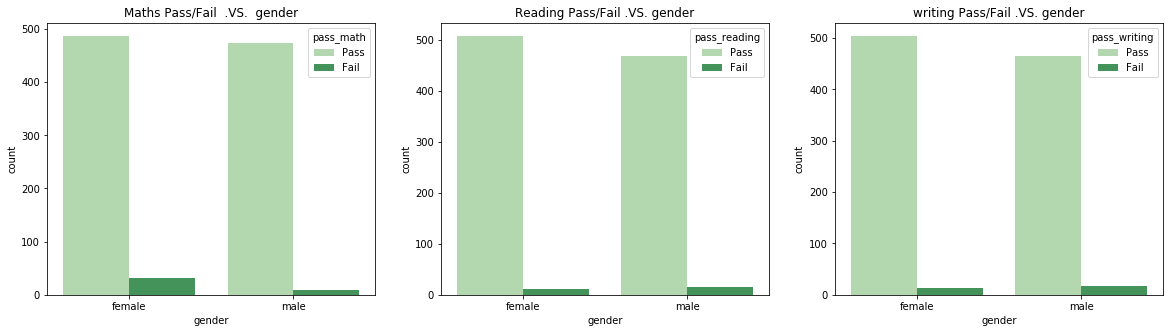

In [35]:
plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1);
default_color = sb.color_palette('vlag',9)[8]

   #plot for maths score
sb.countplot(data = df2, x = 'gender', hue = 'pass_math',palette = 'Greens')
plt.title("Maths Pass/Fail  .VS.  gender");

    #plot for reading score
plt.subplot(1, 3, 2);
sb.countplot(data = df2, x = 'gender', hue = 'pass_reading',palette = 'Greens')
plt.title("Reading Pass/Fail .VS. gender");
    
    #plot for writing score
plt.subplot(1, 3, 3);
sb.countplot(data = df2, x = 'gender', hue = 'pass_writing',palette = 'Greens')
plt.title("writing Pass/Fail .VS. gender");   
plt.show();


at realations between the gender and the 3 subjects  with the bar plots above we discoverd that :
    
    
    at maths   the pass rate at the females is higher than at males and the failur rate at females is higher than at males ,
    
    at reading the pass rate at the females is higher than at males and the failur rate at males is higher than at females,
    
    at writing the pass rate at the females is higher than at males and the failur rate at males is higher than at females
    
    

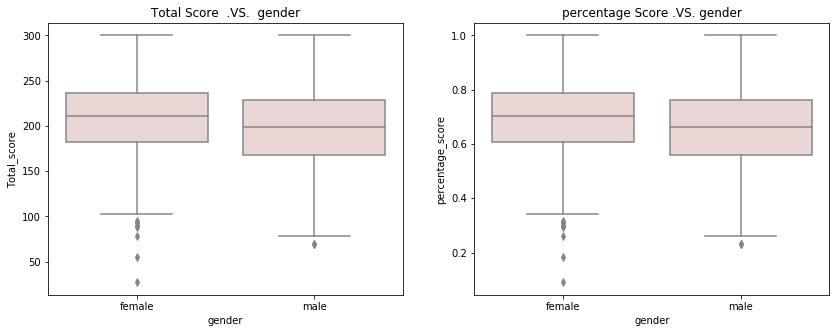

In [36]:
#relations between gender and total,percentage score 

plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1);
default_color = sb.color_palette('vlag',9)[5]

   #plot for gender & total score score
sb.boxplot(data=df2,x='gender', y='Total_score',color=default_color)
plt.title("Total Score  .VS.  gender");

   #plot for gender & percentage score 
plt.subplot(1, 2, 2);
sb.boxplot(data=df2,x='gender', y='percentage_score',color=default_color)
plt.title("percentage Score .VS. gender");
    
plt.show();

In [37]:
df2.groupby('gender')['Total_score',"percentage_score"].mean().T


gender,female,male
Total_score,208.708494,197.512448
percentage_score,0.695695,0.658375


at realations between the gender and total,percentage score with the boxs plots above we discoverd that :
    
    
    the average of total score at the females is higher than at males  (male=197.5<female=208.7),
    
    the average of percentage score at the female is higher than at males  (male=0.69<female=0.65),
        

In [38]:
print(df2.groupby('gender')["result_score"].value_counts())

gender  result_score
female  Pass            509
        Fail              9
male    Pass            476
        Fail              6
Name: result_score, dtype: int64


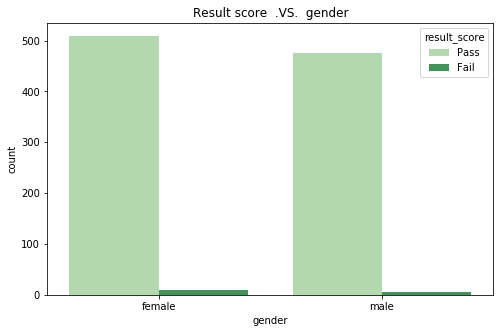

In [39]:
#plot for result score and gender 
plt.figure(figsize=(8,5))
default_color = sb.color_palette('vlag',9)[8]
sb.countplot(data = df2, x = 'gender', hue = 'result_score'
,palette = 'Greens')
plt.title("Result score  .VS.  gender");


from the plot above we see that at the result of the 3 subjects together  (Pass/Fail) the females is higher than males at the pass rate 
but it also is higher than at fail rate 

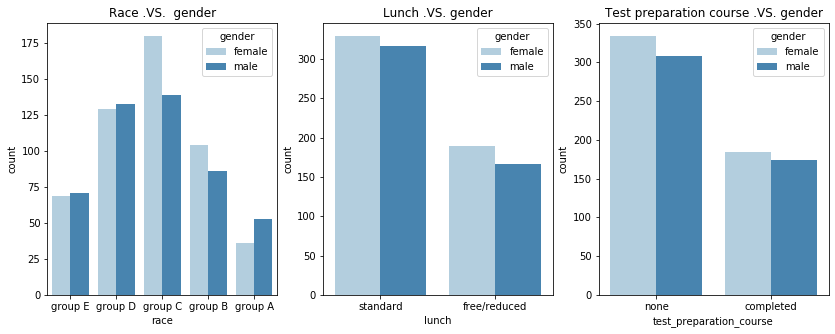

In [40]:
#relations between gender and race,lunch,test_preparation_course


plt.figure(figsize=(14,5))
plt.subplot(1, 3, 1);
default_color = sb.color_palette('vlag',9)[8]

   #plot for race
sb.countplot(data = df2, x = 'race', hue = 'gender',palette = 'Blues')
plt.title("Race .VS.  gender");

    #plot for lunch
plt.subplot(1, 3, 2);
sb.countplot(data = df2, x = 'lunch', hue = 'gender',palette = 'Blues')
plt.title("Lunch .VS. gender");
    
    #plot for test_preparation_course
plt.subplot(1, 3, 3);
sb.countplot(data = df2, x = 'test_preparation_course', hue = 'gender',palette = 'Blues')
plt.title("Test preparation course .VS. gender");   
plt.show();


first >> race vs gender: we can see the counts of the race groubs according to gender  which groub c is the biggest groub have numbers of females and males
    
    
second >> lunch vs gender : we can see most of both the females and males have standard lunch


third>>test preparation course vs gender: most of both the females and males didn't preparation for course test 
    
    
    

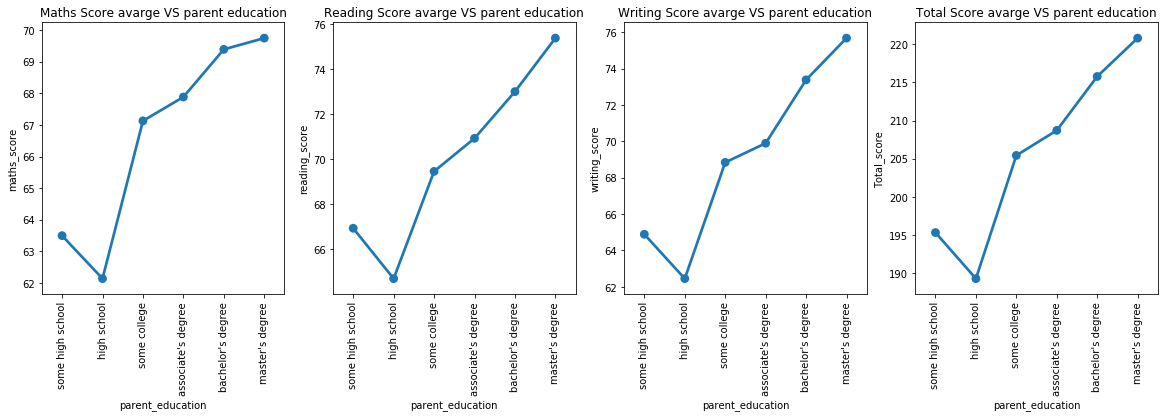

In [41]:
#relations between parent education and maths score,reading score,writing score,Total score

p1=df2.groupby('parent_education')['maths_score'].mean().sort_values()
p2=df2.groupby('parent_education')['reading_score'].mean().sort_values()
p3=df2.groupby('parent_education')['writing_score'].mean().sort_values()
p4=df2.groupby('parent_education')['Total_score'].mean().sort_values()

color=sb.color_palette()[0]
plt.figure(figsize=(20,5))
plt.subplot(1, 4, 1);    
sb.pointplot(data=df2,x=p1.index, y=p1,color=color)
plt.title("Maths Score avarge VS parent education");
plt.xticks(rotation=90);


plt.subplot(1, 4, 2);    
sb.pointplot(data=df2,x=p2.index, y=p2,color=color)
plt.title("Reading Score avarge VS parent education");
plt.xticks(rotation=90);


plt.subplot(1, 4, 3);    
sb.pointplot(data=df2,x=p3.index, y=p3,color=color)
plt.title("Writing Score avarge VS parent education");
plt.xticks(rotation=90);


plt.subplot(1, 4, 4);    
sb.pointplot(data=df2,x=p4.index, y=p4,color=color)
plt.title("Total Score avarge VS parent education");
plt.xticks(rotation=90);


we asked at the first if the parent education affects with the result or not now we will know the answer with the point plots above:


 the avarge highest grades at all 3 subjects and the total score happened with parent education of master 's degree 
and the lowest avarge grade at math happened with parent education of high school 

so the  the parent education is realy  affects with the result.
    
    

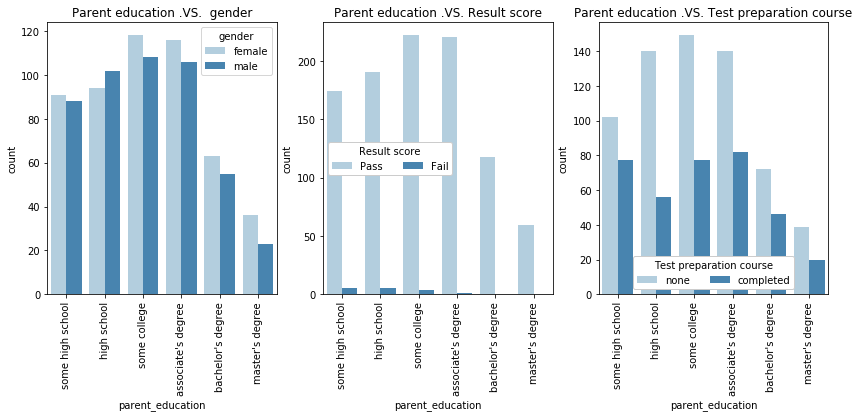

In [42]:
#relations between Parent education and gender , Result score,Test preparation course


plt.figure(figsize=(14,5))
default_color = sb.color_palette('vlag',9)[8]

plt.subplot(1, 3, 1);    
sb.countplot(data = df2, x = 'parent_education', hue = 'gender',palette = 'Blues')
plt.xticks(rotation=90);
plt.title("Parent education .VS.  gender");

plt.subplot(1, 3,2);
sb.countplot(data = df2, x = 'parent_education', hue = 'result_score',palette = 'Blues')
plt.legend(loc = 6, ncol = 3, framealpha = 1, title = 'Result score')

plt.xticks(rotation=90);

plt.title("Parent education .VS. Result score");   

plt.subplot(1, 3,3);
sb.countplot(data = df2, x = 'parent_education', hue = 'test_preparation_course',palette = 'Blues')
plt.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Test preparation course')
plt.xticks(rotation=90);

plt.title("Parent education .VS. Test preparation course");   
plt.show();

first >> Parent education vs gender: we can see the counts of the gender according to Parent education  which the level of 
"some collage" is the biggest level have numbers of females and males and "master degree" is the lowest with numbers
    
    
second >> Parent education vs result score : we can see the counts of the pass or fail students according to Parent education
we can see an intersting result which the level  of  
"master's degree"  and "bachelor's degree" no one fail all students with pass 


third>>Parent education vs Test preparation course: we can see the counts of the Test preparation course  according to Parent education  which the level of 
"some collage" is the biggest level have numbers students with preparation course "master degree" is the lowest with numbers
    
    

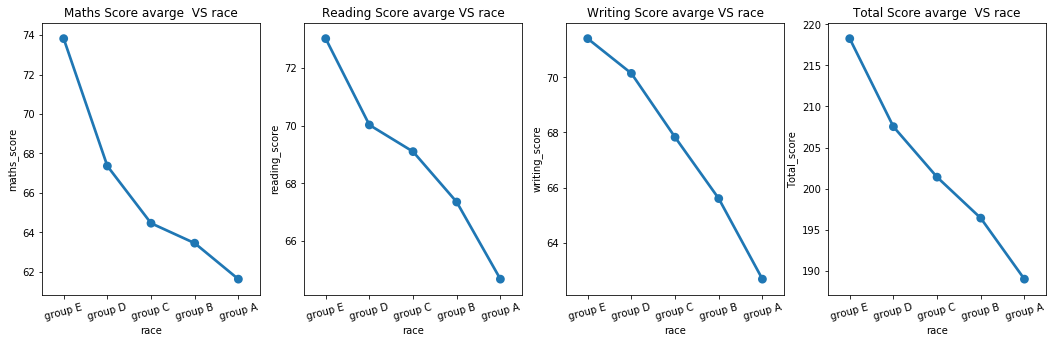

In [43]:
#relations between Race and maths score,reading score,writing score,Total score


g1=df2.groupby('race')['maths_score'].mean().sort_values()
g2=df2.groupby('race')['reading_score'].mean().sort_values()
g3=df2.groupby('race')['writing_score'].mean().sort_values()
g4=df2.groupby('race')['Total_score'].mean().sort_values()

color=sb.color_palette()[0]
plt.figure(figsize=(18,5))
plt.subplot(1, 4, 1);    
sb.pointplot(data=df2,x=g1.index, y=g1,color=color)
plt.title("Maths Score avarge  VS race");
plt.xticks(rotation=15);


plt.subplot(1, 4, 2);    
sb.pointplot(data=df2,x=g2.index, y=g2,color=color)
plt.title("Reading Score avarge VS race");
plt.xticks(rotation=15);


plt.subplot(1, 4, 3);    
sb.pointplot(data=df2,x=g3.index, y=g3,color=color)
plt.title("Writing Score avarge VS race");
plt.xticks(rotation=15);


plt.subplot(1, 4, 4);    
sb.pointplot(data=df2,x=g4.index, y=g4,color=color)
plt.title("Total Score avarge  VS race");
plt.xticks(rotation=15);



 from the the point plots above:


 the avarge highest grades at all 3 subjects and the total score happened with the race group "E"
and the lowest avarge grade at all 3 subjects and the total score happened with the race group "A"
        

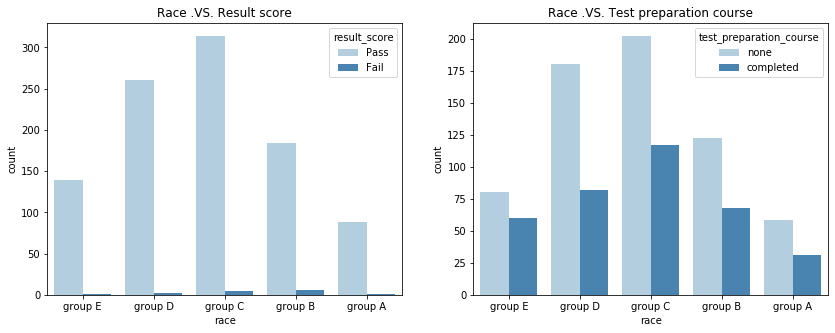

In [44]:
#relations between Race and result score,Test preparation course
plt.figure(figsize=(14,5))
default_color = sb.color_palette('vlag',9)[8]

plt.subplot(1, 2, 1);
sb.countplot(data = df2, x = 'race', hue = 'result_score',palette = 'Blues')
plt.title("Race .VS. Result score");

plt.subplot(1, 2, 2);
sb.countplot(data = df2, x = 'race', hue = 'test_preparation_course',palette = 'Blues')
plt.title("Race .VS. Test preparation course");
    

first >> race vs result score: we can see the counts of the result score(pass/fail) according to race groubs  which the level of 
"Groub C" is the biggest numbers of pass students  and "Groub A"  is the lowest with pass students
    
    
second >> race vs Test preparation course : we can see the counts of the Test preparation course(none/completed) according to race groubs
we can see that "Groub C" is the biggest numbers of completed  students at preparation and "Groub A"  is the lowest with completed  students at preparation


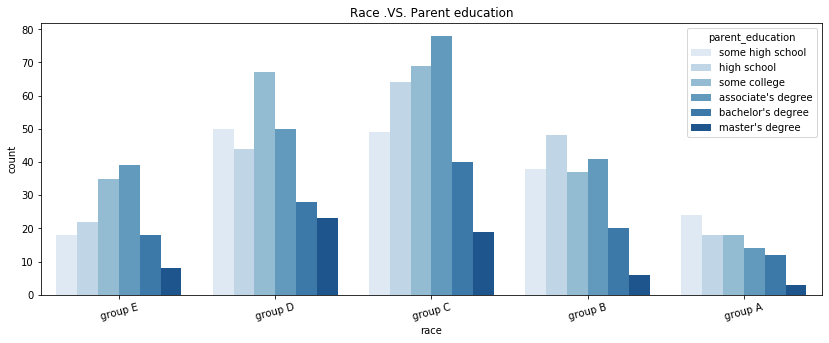

In [45]:
#relation between Race and Parent education
plt.figure(figsize=(14,5))
sb.countplot(data = df2, x = 'race', hue = 'parent_education',palette = 'Blues');
plt.title("Race .VS. Parent education");
plt.xticks(rotation=15);

we can see the counts of the levels of parent education according to race groubs  which the level of 

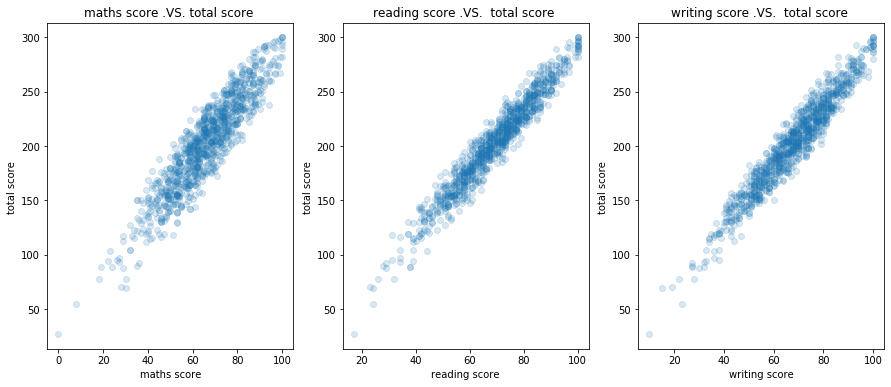

In [46]:
#relations between Total score and maths,reading,writing score


plt.figure(figsize = [15, 6])

plt.subplot(1, 3, 1);
plt.scatter(data = df2, x = 'maths_score', y = 'Total_score', alpha = 1/6)
plt.xlabel('maths score')
plt.ylabel('total score ')
plt.title("maths score .VS. total score ")

plt.subplot(1, 3, 2);
plt.scatter(data = df2, x = 'reading_score', y = 'Total_score', alpha = 1/6)
plt.xlabel('reading score')
plt.ylabel('total score ')
plt.title("reading score .VS.  total score ")

plt.subplot(1, 3, 3);
plt.scatter(data = df2, x = 'writing_score', y = 'Total_score', alpha = 1/6)
plt.xlabel('writing score')
plt.ylabel('total score ')
plt.title("writing score .VS.  total score ") 

plt.show()

the four featuers are numirc vars so we used the scatter plots and as we see all feature look similar because they have high correlation


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

at the data we made alot of realtions between most of the featuers and we know the realtions between the total and result score with  parent educations and the gender and all the subjets and alot of realtions like that above

and i found that intersting when my assum become true about the realtions between 
Parent education vs result score which apper the counts of the pass or fail students according to Parent education and result :
we can see an intersting result which the level  of  
"master degree" and "bachelor's degree" no one fail all students with pass 




too here we end the bivariate Exploration let's move on to multivariate Exploration>>


## Multivariate Exploration

The main thing I want to explore in this part of the analysis is how the three categorical measures of quality play into the relationship between Total_score and percentage_score.

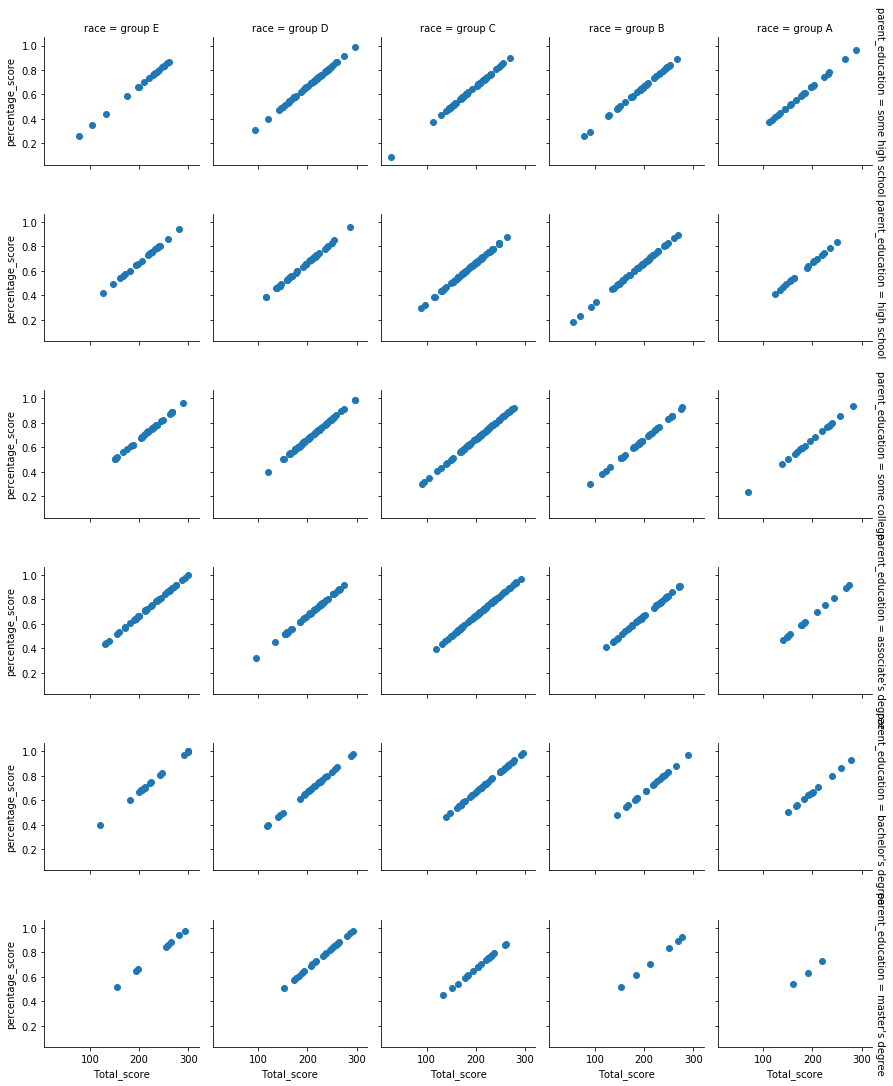

In [47]:
# create faceted scatter plots  on levels of race and parent_education
warnings.filterwarnings("ignore")


g = sb.FacetGrid(data = df2, col = 'race', row = 'parent_education', size = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'Total_score', 'percentage_score');


we create faceted scatter plots on levels of race and parent education with the two numeric vars 'Total_score', 'percentage_score' and as we see the feauters are high correleated 


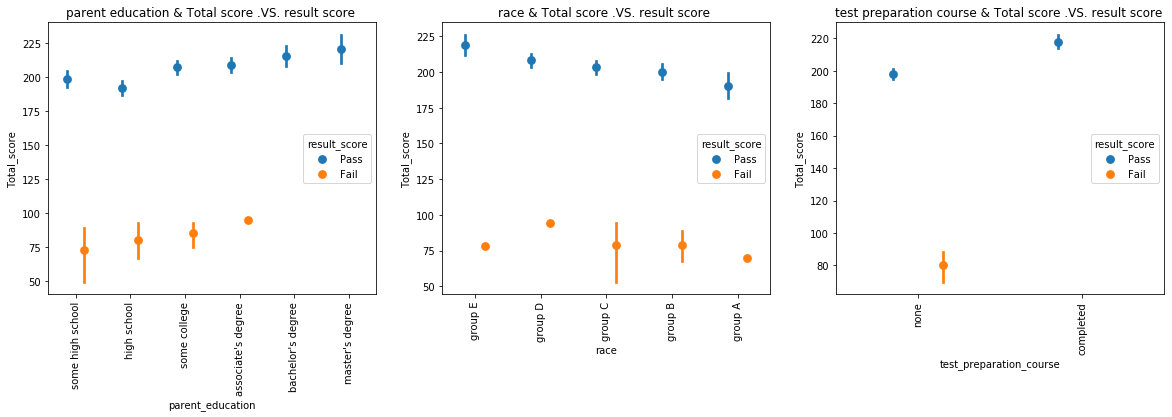

In [48]:
#Multivariate relations between 
#result score vs (parent education & Total score),(race & Total score),(test preparation course & Total score)

plt.figure(figsize=[20,5])

plt.subplot(1,3,1)
sb.pointplot(data = df2, x = 'parent_education', y = 'Total_score', hue = 'result_score',
                  dodge = 0.3, linestyles = "")
plt.xticks(rotation=90);
plt.legend(loc = 5, title = 'result_score')
plt.title("parent education & Total score .VS. result score ")



plt.subplot(1,3,2)
sb.pointplot(data = df2, x = 'race', y = 'Total_score', hue = 'result_score',
                  dodge = 0.3, linestyles = "")
plt.xticks(rotation=90);
plt.title("race & Total score .VS. result score ")


plt.subplot(1,3,3)
sb.pointplot(data = df2, x = 'test_preparation_course', y = 'Total_score', hue = 'result_score',
                  dodge = 0.3, linestyles = "")
plt.xticks(rotation=90);
plt.legend(loc = 5, title = 'result_score')
plt.title("test preparation course & Total score .VS. result score ");


this is Multivariate relations between  3 feauters at the same time in 3 point plots the 2 feauters is accordaing to result score (Fail/pass) in every plot.
we notic that at the last plot :The students who completed Test Preparation course no one of them fail 


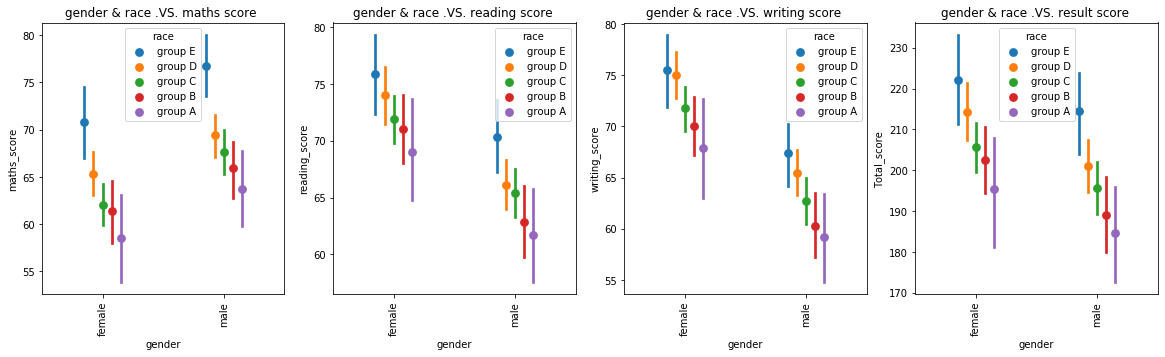

In [49]:
#Multivariate relations between 
#(gender & race) vs (maths score),(reading score),(writing score)

plt.figure(figsize=[20,5])

plt.subplot(1,4,1)
sb.pointplot(data = df2, x = 'gender', y = 'maths_score', hue = 'race',
                  dodge = 0.3, linestyles = "")
plt.xticks(rotation=90);
plt.title("gender & race .VS. maths score ")



plt.subplot(1,4,2)
sb.pointplot(data = df2, x = 'gender', y = 'reading_score', hue = 'race',
                  dodge = 0.3, linestyles = "")
plt.xticks(rotation=90);
plt.title("gender & race .VS. reading score ")


plt.subplot(1,4,3)
sb.pointplot(data = df2, x = 'gender', y = 'writing_score', hue = 'race',
                  dodge = 0.3, linestyles = "")
plt.xticks(rotation=90);
plt.title("gender & race .VS. writing score ");


plt.subplot(1,4,4)
sb.pointplot(data = df2, x = 'gender', y = 'Total_score', hue = 'race',
                  dodge = 0.3, linestyles = "")
plt.xticks(rotation=90);
plt.title("gender & race .VS. result score ");

this is Multivariate relations between  3 feauters at the same time in 4 point plots the 2 feauters is accordaing to result race groubs in every plot

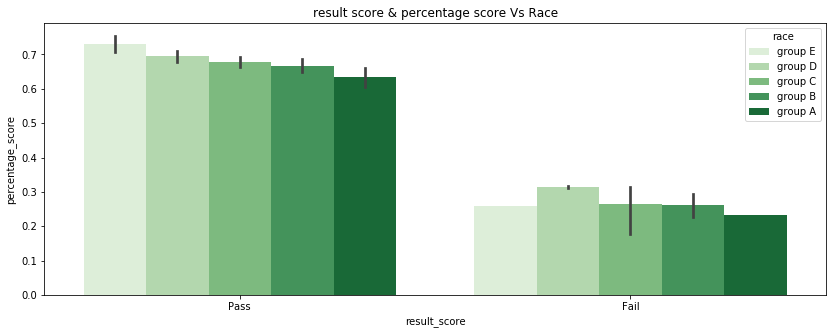

In [50]:
#relations between 
#(result score & percentage) vs (race)


plt.figure(figsize=[14,5])

sb.barplot(data=df2,x='result_score',y='percentage_score',hue='race',palette = 'Greens');
plt.title("result score & percentage score Vs Race");


at this relation the 2 feauters(result score & percentage score) in this plot according to Race groubs 

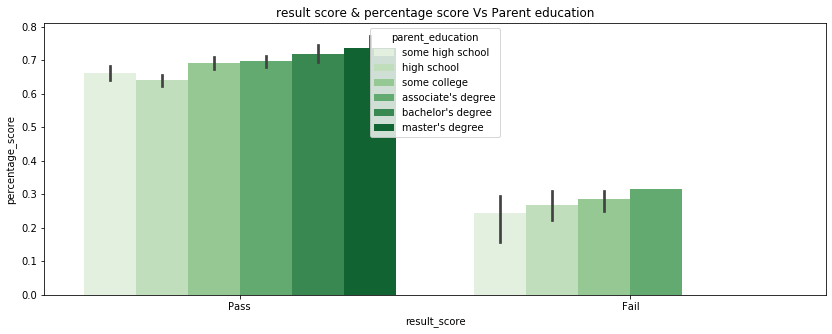

In [51]:
#relations between 
#(result score & percentage) vs (Parent education)
plt.figure(figsize=[14,5])

sb.barplot(data=df2,x='result_score',y='percentage_score',hue='parent_education',palette = 'Greens');
plt.title("result score & percentage score Vs Parent education");


at this relation the 2 feauters(result score & percentage score) in this plot according to Parent education levels

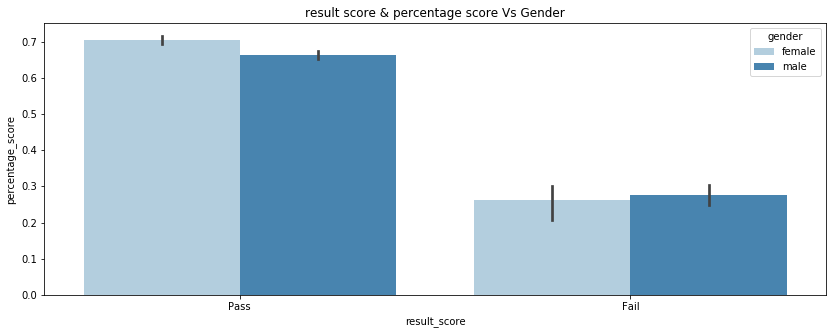

In [52]:
#relations between 
#(result score & percentage) vs (Gender)

plt.figure(figsize=[14,5])

sb.barplot(data=df2,x='result_score',y='percentage_score',hue='gender',palette = 'Blues');
plt.title("result score & percentage score Vs Gender");


at this relation the 2 feauters(result score & percentage score) in this plot according to gender(male/female)

so this is the end of the visualizations analysis let's go to the  Conclusion

# Conclusion

-Males are doing  better than females in maths 

-Females are doing better than males in writing and reading

-Parent education affected with the results of the students, the Students whose parents have completed master's or bachleor's     degree have not failed in any subject otherwise the highest rate of failuer with  the Students whose parents have some high   school.

-The students who completed Test Preparation course no one of them fail 

-the avarge highest grades at all 3 subjects and the total score happened at group "E"
 and the lowest avarge grade at all 3 subjects and the total score happened at group "A"
 
-percentage of success = 98.5% and percentage of failed 1.5%

